# Problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

# Downlaod Files:

* https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv

In [1]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Importing regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor


#Importing Evaluation metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
#Read dataset
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# Prblem solution:

As per problem statement I'll have to predict the winning count which is a continuous value hence it is a regression problem. Column 'W' is our dependent variable and rest all the features are independent variables. We will build few regression models and will compare them basis on their evaluation metrics and choose 1 best model to predict target feature.

In [3]:
#Checking datashape
data.shape

(30, 17)

In [4]:
#Checking data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [5]:
#Checking datatypes
data.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

All featuers are in numerical value. ERA column is float data type and rest all the features are integer.

In [6]:
#Checking unique values of dataset
data.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In [7]:
#Checking null values
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

No null value present in the dataset.

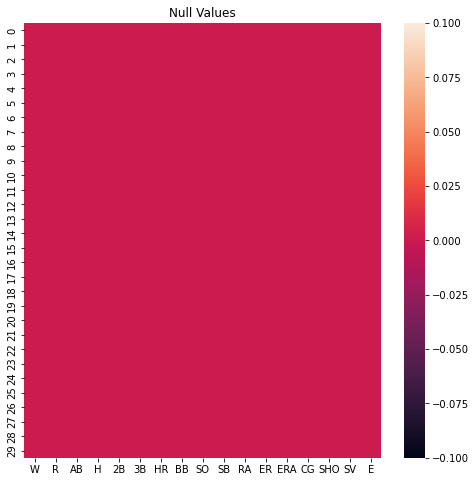

In [8]:
#Checking for null values using heatmap
plt.figure(figsize = (8,8))
sns.heatmap(data.isnull())
plt.title('Null Values')
plt.show()

In [9]:
#Checking statistics of dataset
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Seeing some skewness present in some features will investigate more about it using some statistical methods.

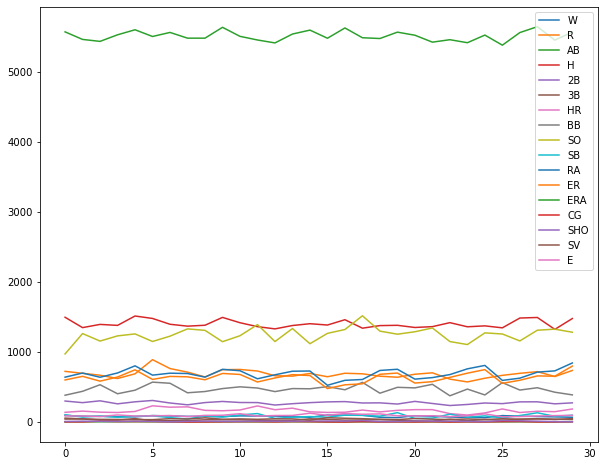

In [10]:
#Checking distribution using line plot
data.plot.line(figsize = (10,8))
plt.show()

Column AB has the highest number of data.

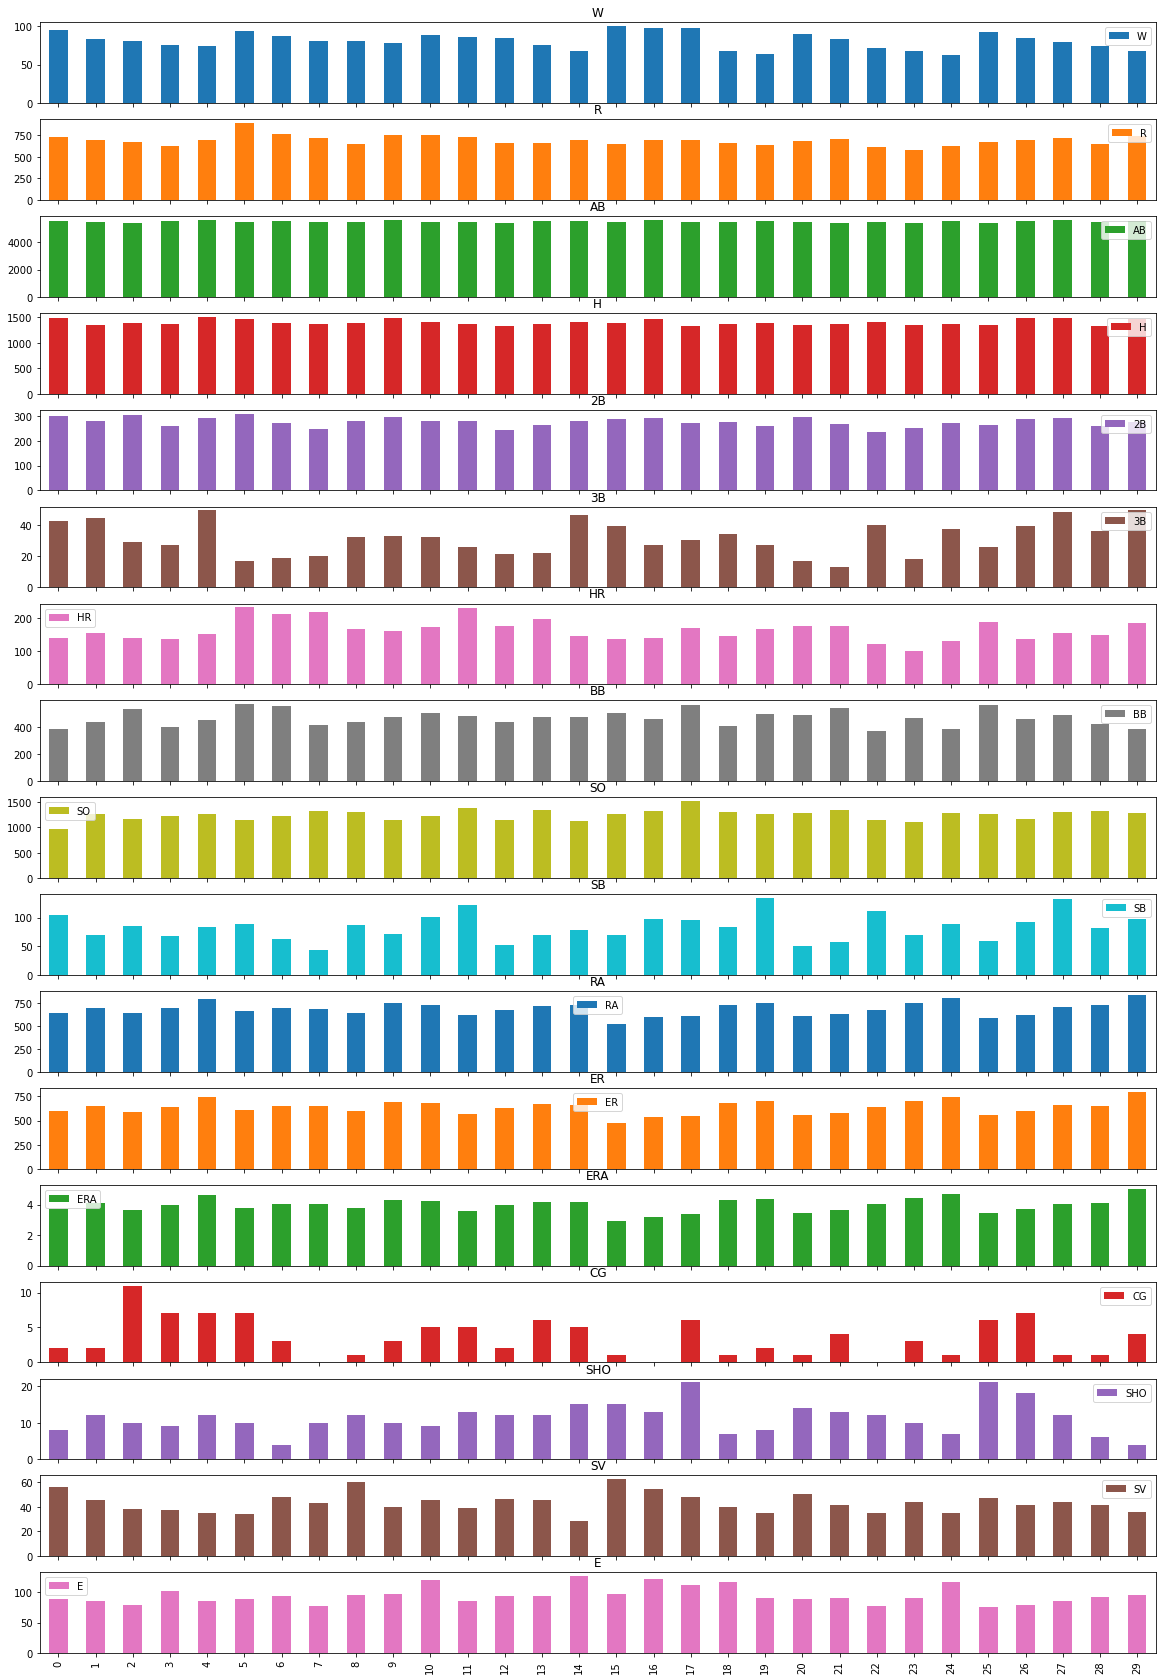

In [11]:
#Using bar plot
data.plot.bar(subplots = True, stacked = False, figsize = (20,30))
plt.show()

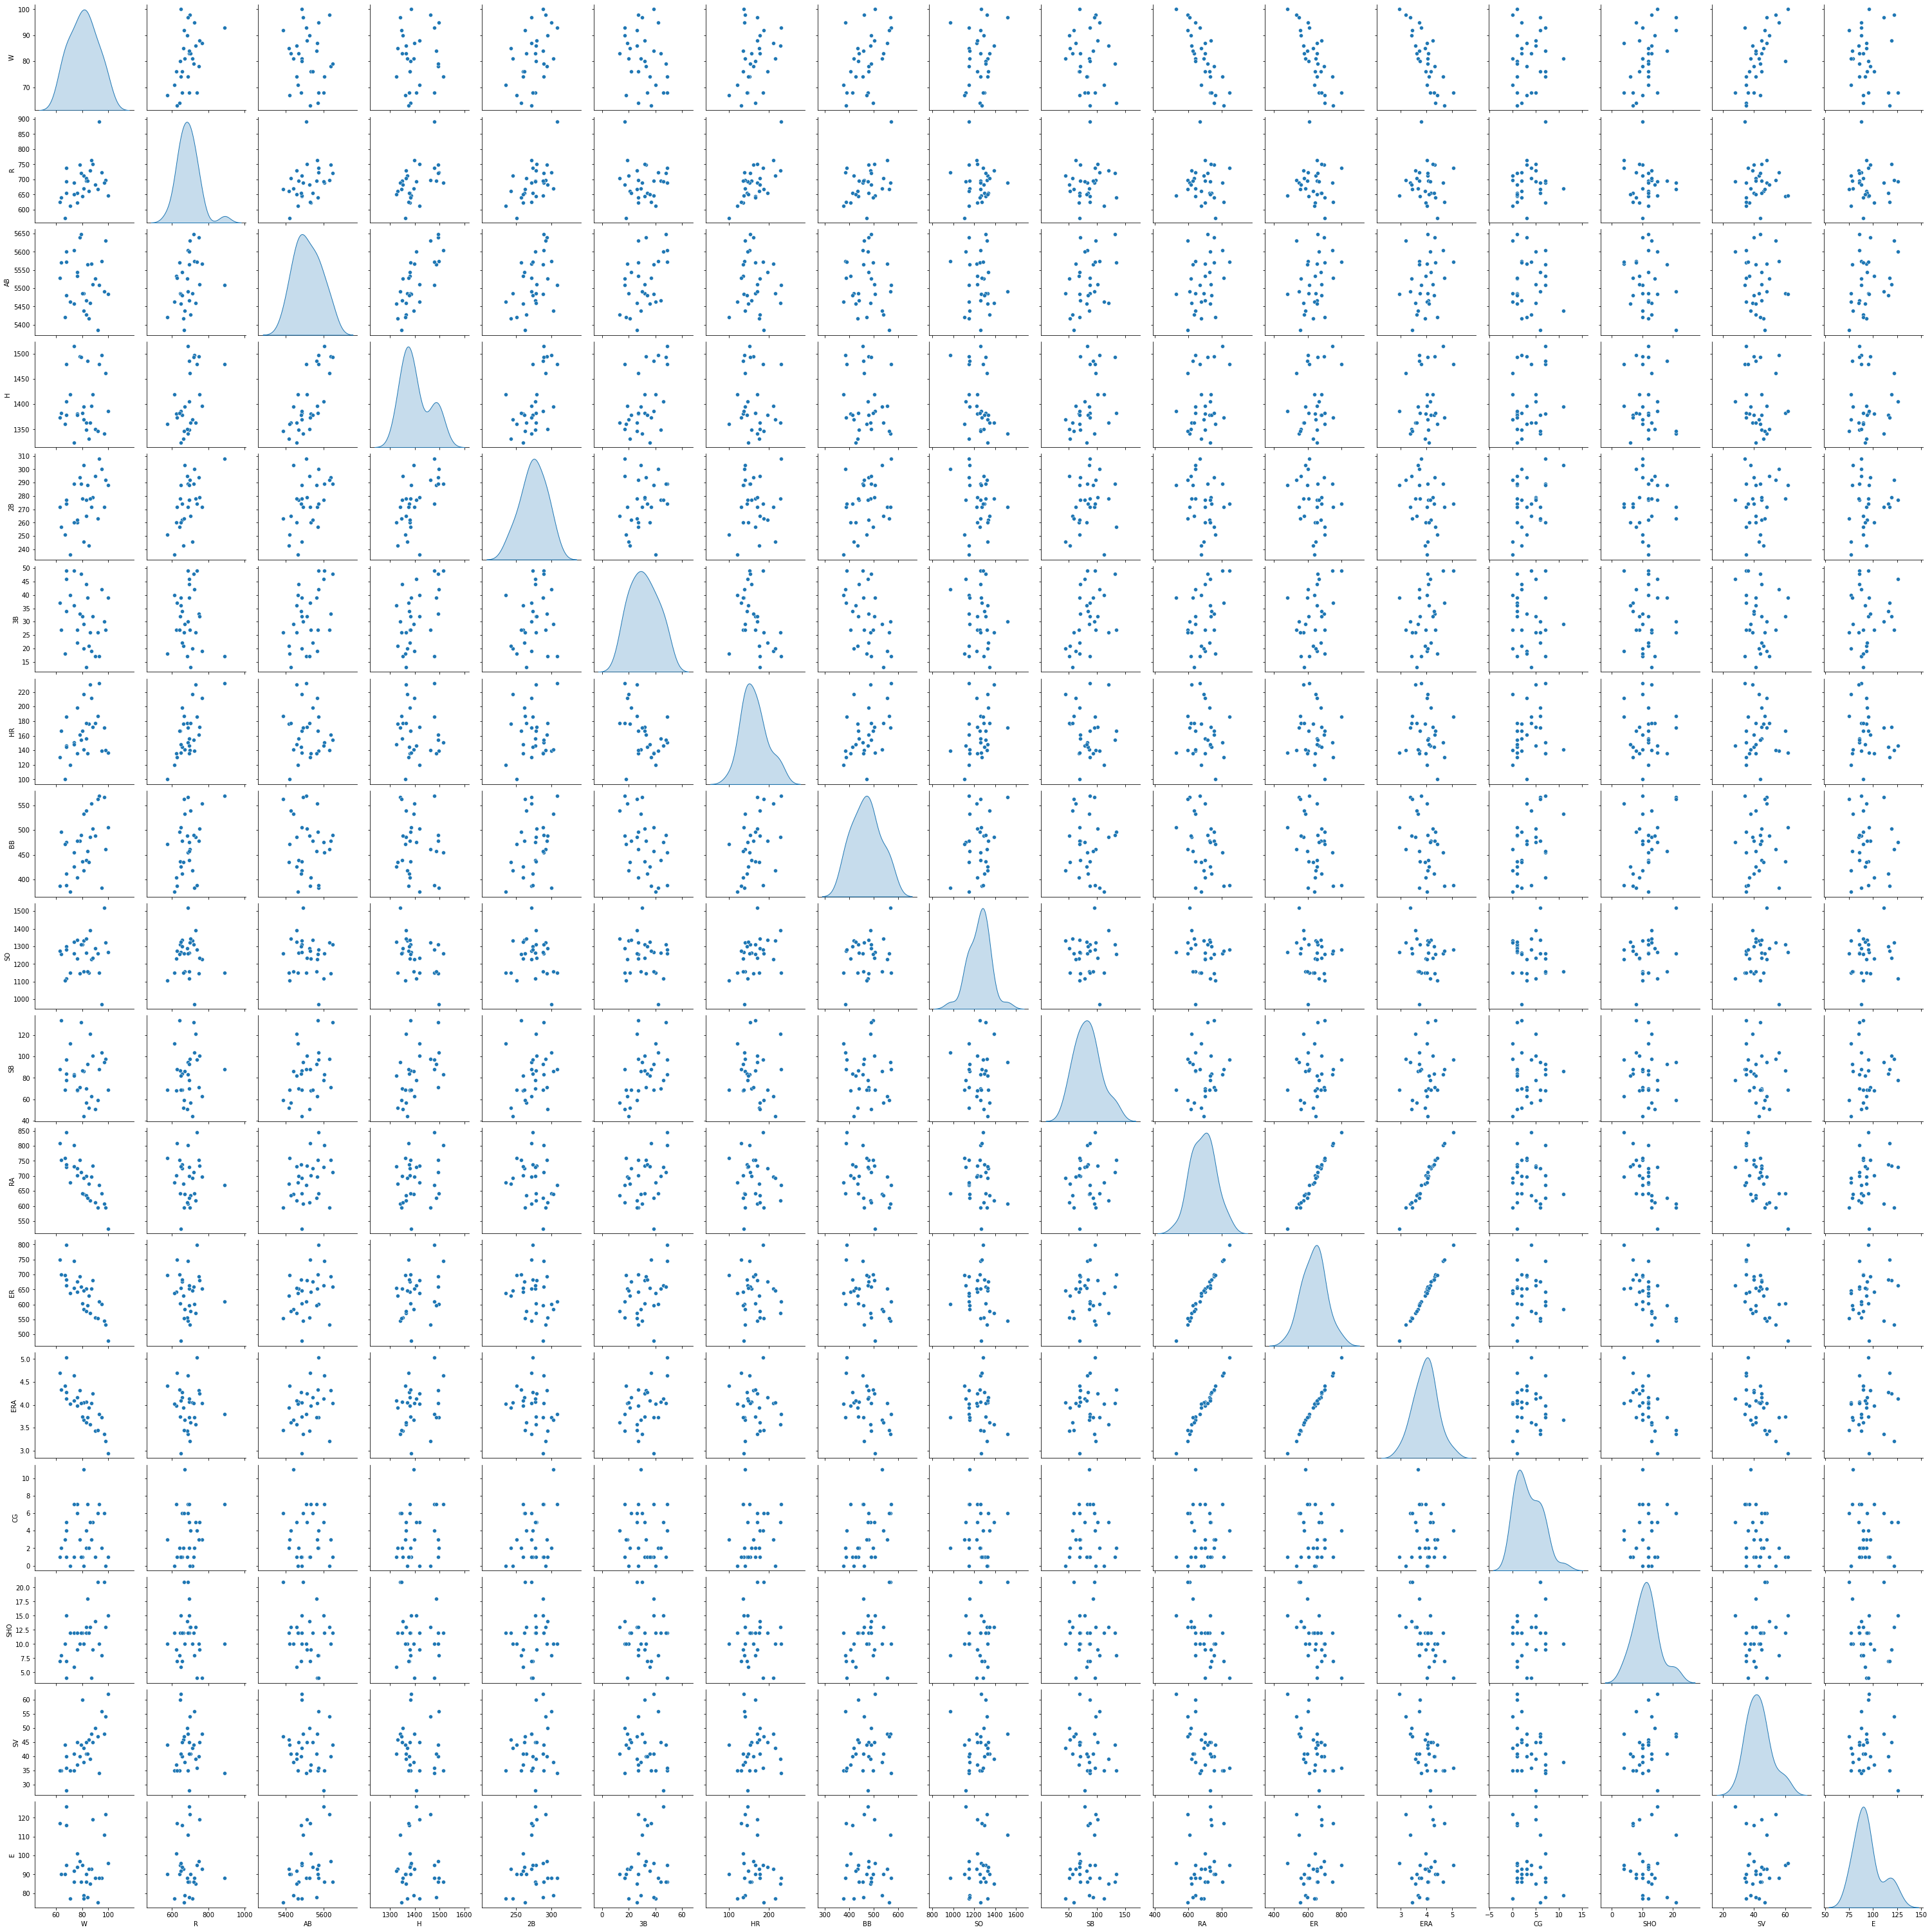

In [12]:
#Using pair plot to understand the relationship between features
sns.pairplot(data, diag_kind = 'kde')
plt.show()

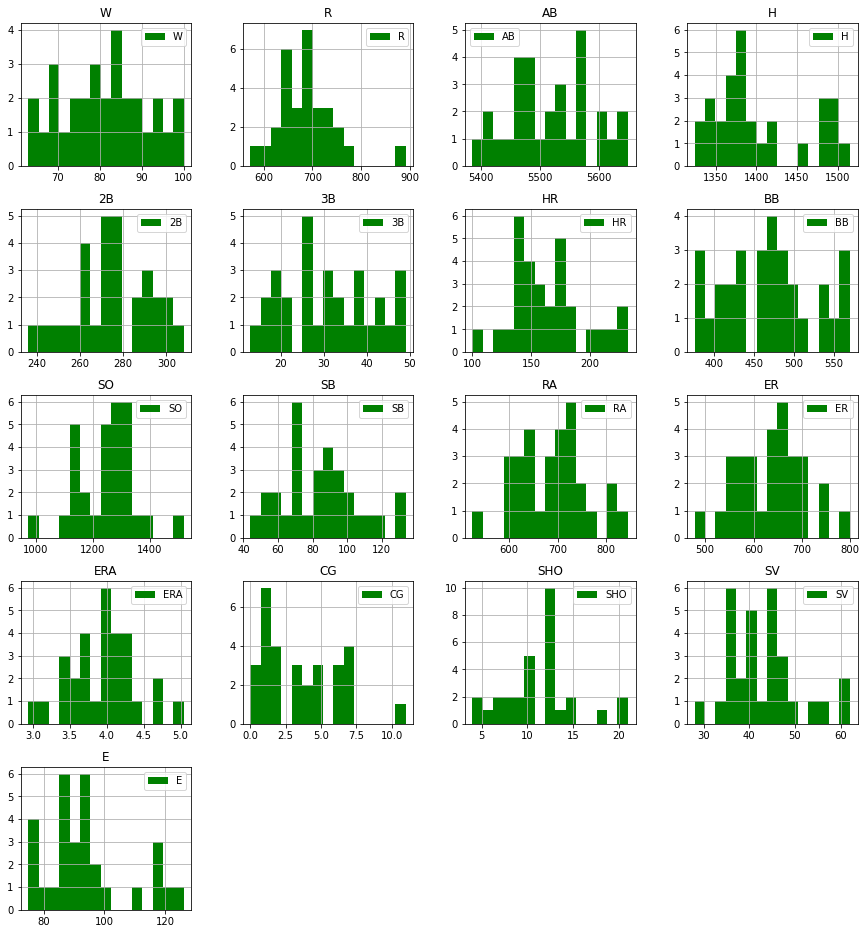

In [13]:
#Using histogram to check distribution
data.hist(figsize = (15,30), layout = (9,4), bins = 15, legend = True, color = 'g')
plt.show()

From above his plot I can observe that data distribution is not normal and ouliers are present in the dataset.

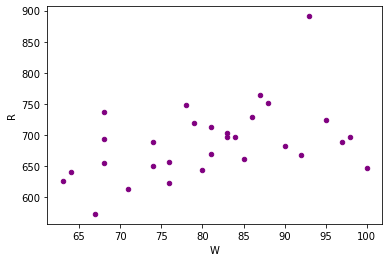

In [14]:
#Checking relationship between dependent variable 'W' and independent variable 'R'
data.plot.scatter(x = 'W', y = 'R', color = 'purple')
plt.show()

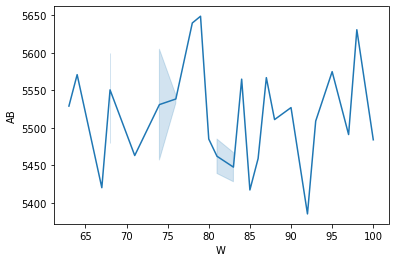

In [15]:
#Using line plot to check relationship between 'W' and 'AB'
sns.lineplot(x = 'W', y = 'AB', data = data)
plt.show()

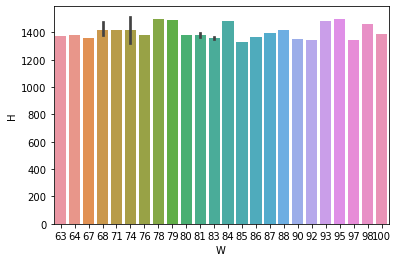

In [16]:
#Using bar plot to check relationship between 'W' and 'H'
sns.barplot(data = data, x = 'W', y = 'H')
plt.show()

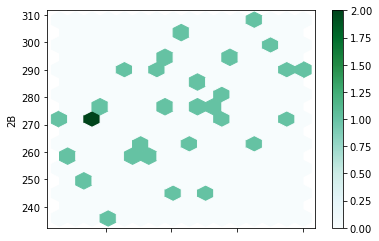

In [17]:
#Using hexbin plot to check relationship between 'W' and '2B'
data.plot.hexbin(x = 'W', y = '2B', gridsize = 15)
plt.show()

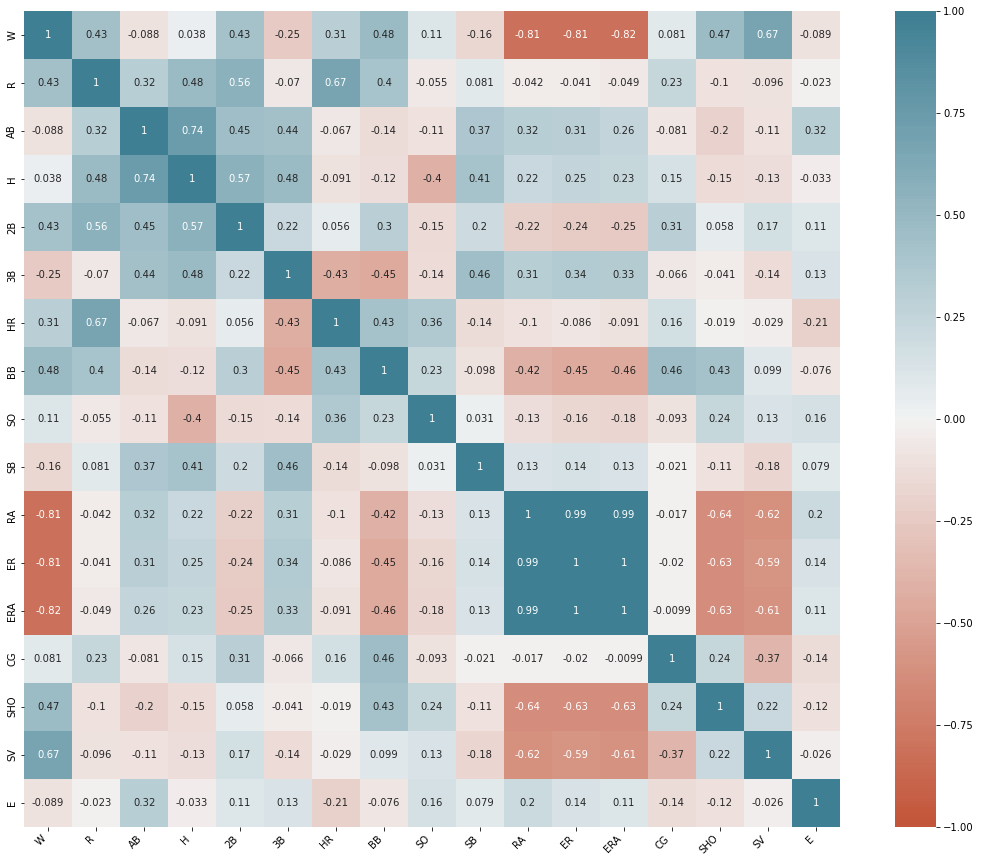

In [18]:
#Checking for correlationship between features
plt.figure(figsize = (20,15))
corr = data.corr()
ax = sns.heatmap(
    corr,
    annot = True,
    vmin = -1, vmax = 1, center = 0,
    cmap = sns.diverging_palette(20, 220, n = 200),
    square = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
);

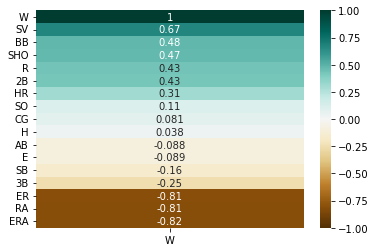

In [19]:
sns.heatmap(data.corr()[['W']].sort_values(by = 'W', ascending = False), vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
plt.show()

# Obvervations on Feature Correlation

* Columns ERA, RA and ER have strong negative correlationship with target W.
* Columns ERA, RA and ER are highly correlated.
* Columns SV, BB, SHO, R, 2B and HR have good relationship with target W.

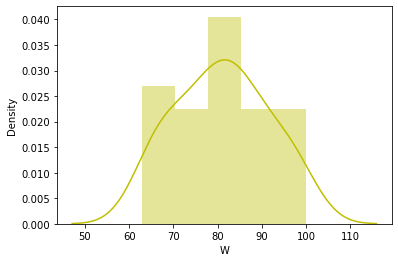

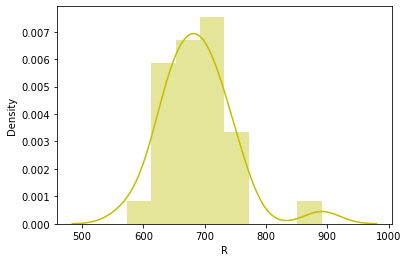

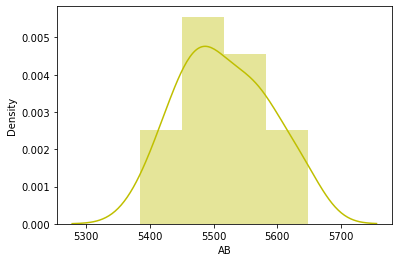

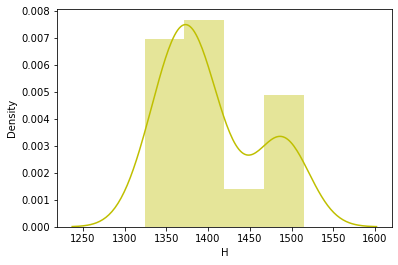

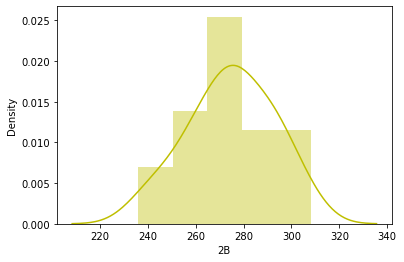

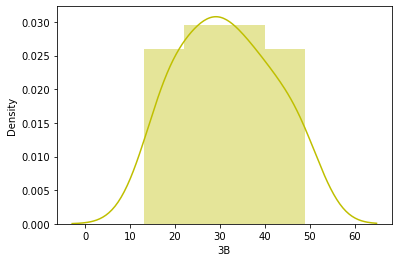

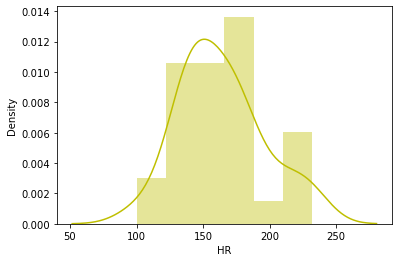

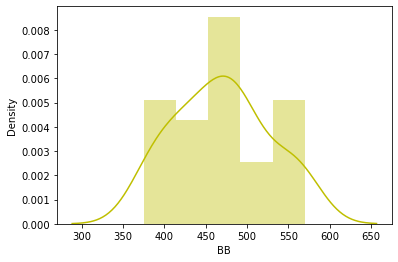

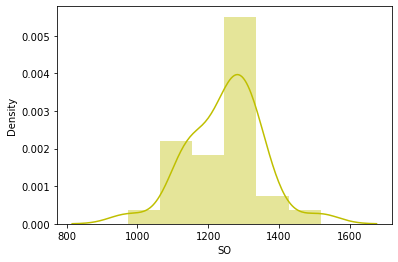

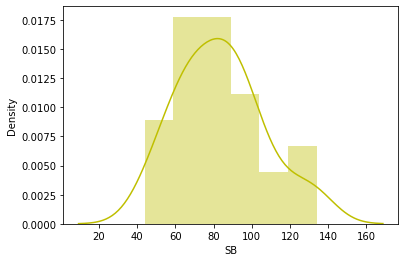

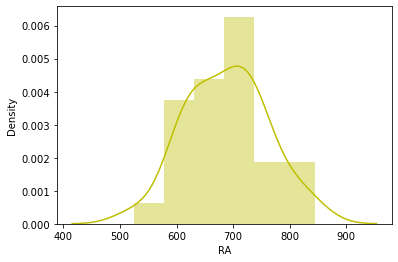

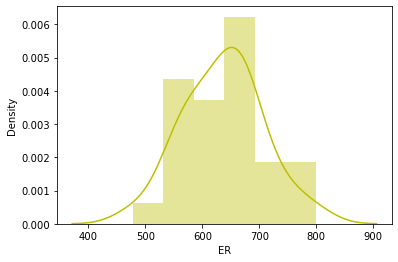

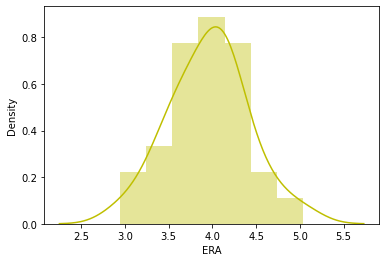

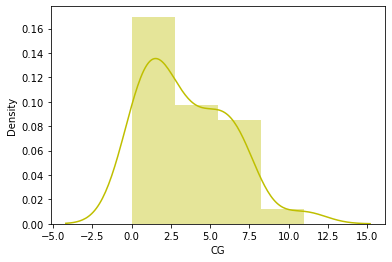

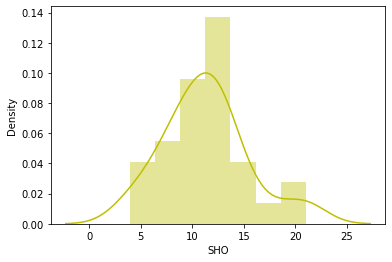

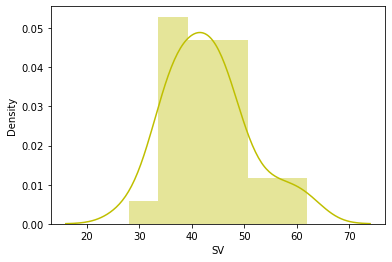

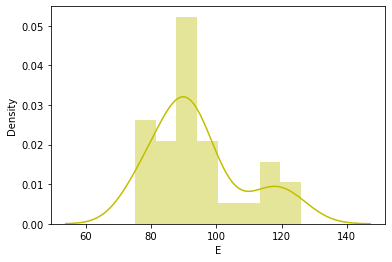

In [20]:
#Checking data distribution.
for i in data.columns:
    plt.figure()
    sns.distplot(data[i], color = 'y')
    
plt.show()

In [21]:
box_data = data.drop(columns = 'W')

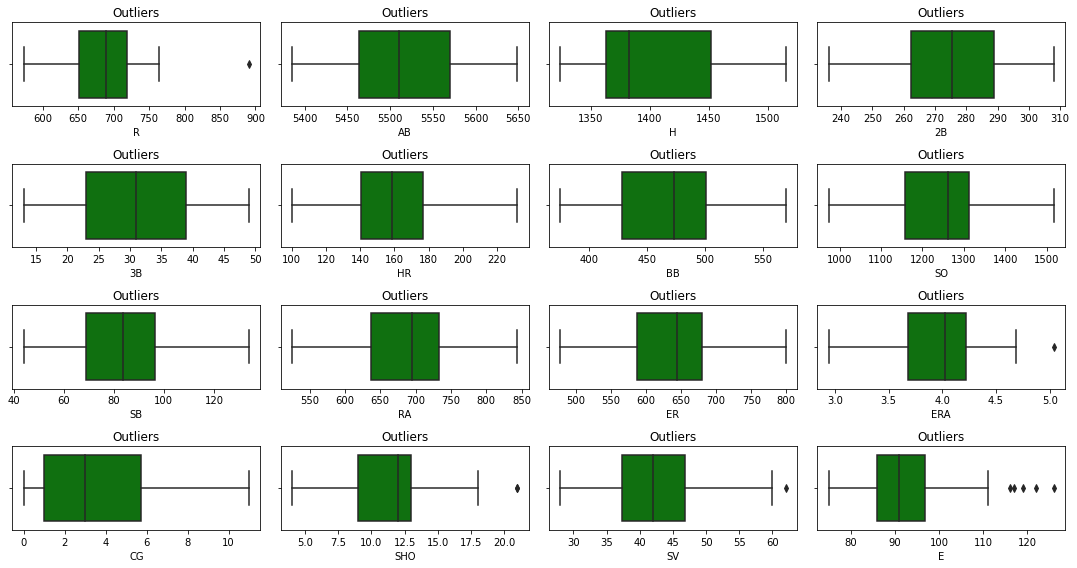

In [22]:
#Check for outliers using box plot
plt.figure(figsize = (15,8))
plotnumber = 1

for column in box_data:
    if plotnumber <= 16:
        plt.subplot(4,4,plotnumber)
        sns.boxplot(data[column], color = 'g')
        plt.xlabel(column)
        plt.title('Outliers')
    
    plotnumber += 1
    
plt.tight_layout()

Outliers present in column 'R', ERA, SHO, SV and E.

In [23]:
#Using z score to remove outlier
from scipy.stats import zscore
z = zscore(data)
z

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,1.365409,0.619078,0.847731,1.663685,1.420173,1.041193,-0.787299,-1.534902,-2.697630,0.913883,-0.666234,-0.505110,-0.506955,-0.539806,-0.814629,1.671607,-0.461470
1,0.197838,0.134432,-0.711094,-0.970681,0.127403,1.235809,-0.243967,-0.536592,0.154878,-0.601826,0.165971,0.248930,0.254598,-0.539806,0.172800,0.249879,-0.607197
2,0.003243,-0.332906,-1.115233,-0.151891,1.588795,-0.223808,-0.723377,1.139144,-0.893982,0.111449,-0.680339,-0.751623,-0.641347,2.772641,-0.320914,-0.654856,-1.117242
3,-0.483244,-1.146419,0.241522,-0.401088,-0.828122,-0.418423,-0.883181,-1.160536,-0.168602,-0.690985,0.180076,0.103922,0.053010,1.300442,-0.567771,-0.784104,0.485758
4,-0.677839,0.013270,1.280738,1.984081,0.801892,1.722347,-0.403770,-0.251360,0.105866,-0.022290,1.618803,1.597501,1.531318,1.300442,0.172800,-1.042600,-0.607197
5,1.170814,3.509647,-0.104884,1.361089,1.869832,-1.391501,2.185047,1.798742,-0.952796,0.200609,-0.257184,-0.389104,-0.350165,1.300442,-0.320914,-1.171848,-0.461470
6,0.587028,1.311430,0.732263,-0.116292,-0.153633,-1.196885,1.545833,1.513510,-0.207812,-0.913883,0.137760,0.234429,0.165003,-0.171757,-1.802057,0.637623,-0.097152
7,0.003243,0.428681,-0.451289,-0.596886,-1.615025,-1.099578,1.705636,-0.910958,0.811641,-1.760897,0.067235,0.147424,0.209800,-1.275906,-0.320914,-0.008617,-1.262970
8,-0.094054,-0.765626,-0.451289,-0.365489,0.183611,0.068115,0.107601,-0.590073,0.605790,0.156029,-0.652129,-0.461608,-0.484557,-0.907856,0.172800,2.188598,0.048576
9,-0.288649,1.034489,1.785913,1.628086,1.082929,0.165423,-0.084163,0.158660,-0.982204,-0.557246,0.913544,0.843461,0.792164,-0.171757,-0.320914,-0.396360,0.194303


In [24]:
new_data = data[(z < 3).all(axis = 1)]
new_data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [25]:
new_data.shape

(29, 17)

In [26]:
data.shape

(30, 17)

In [27]:
#Printing data loss
data_loss = (30 - 29)/30 * 100
print('Data loss percentage after removing outliers: ', data_loss)

Data loss percentage after removing outliers:  3.3333333333333335


In [28]:
col = new_data.columns
col

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

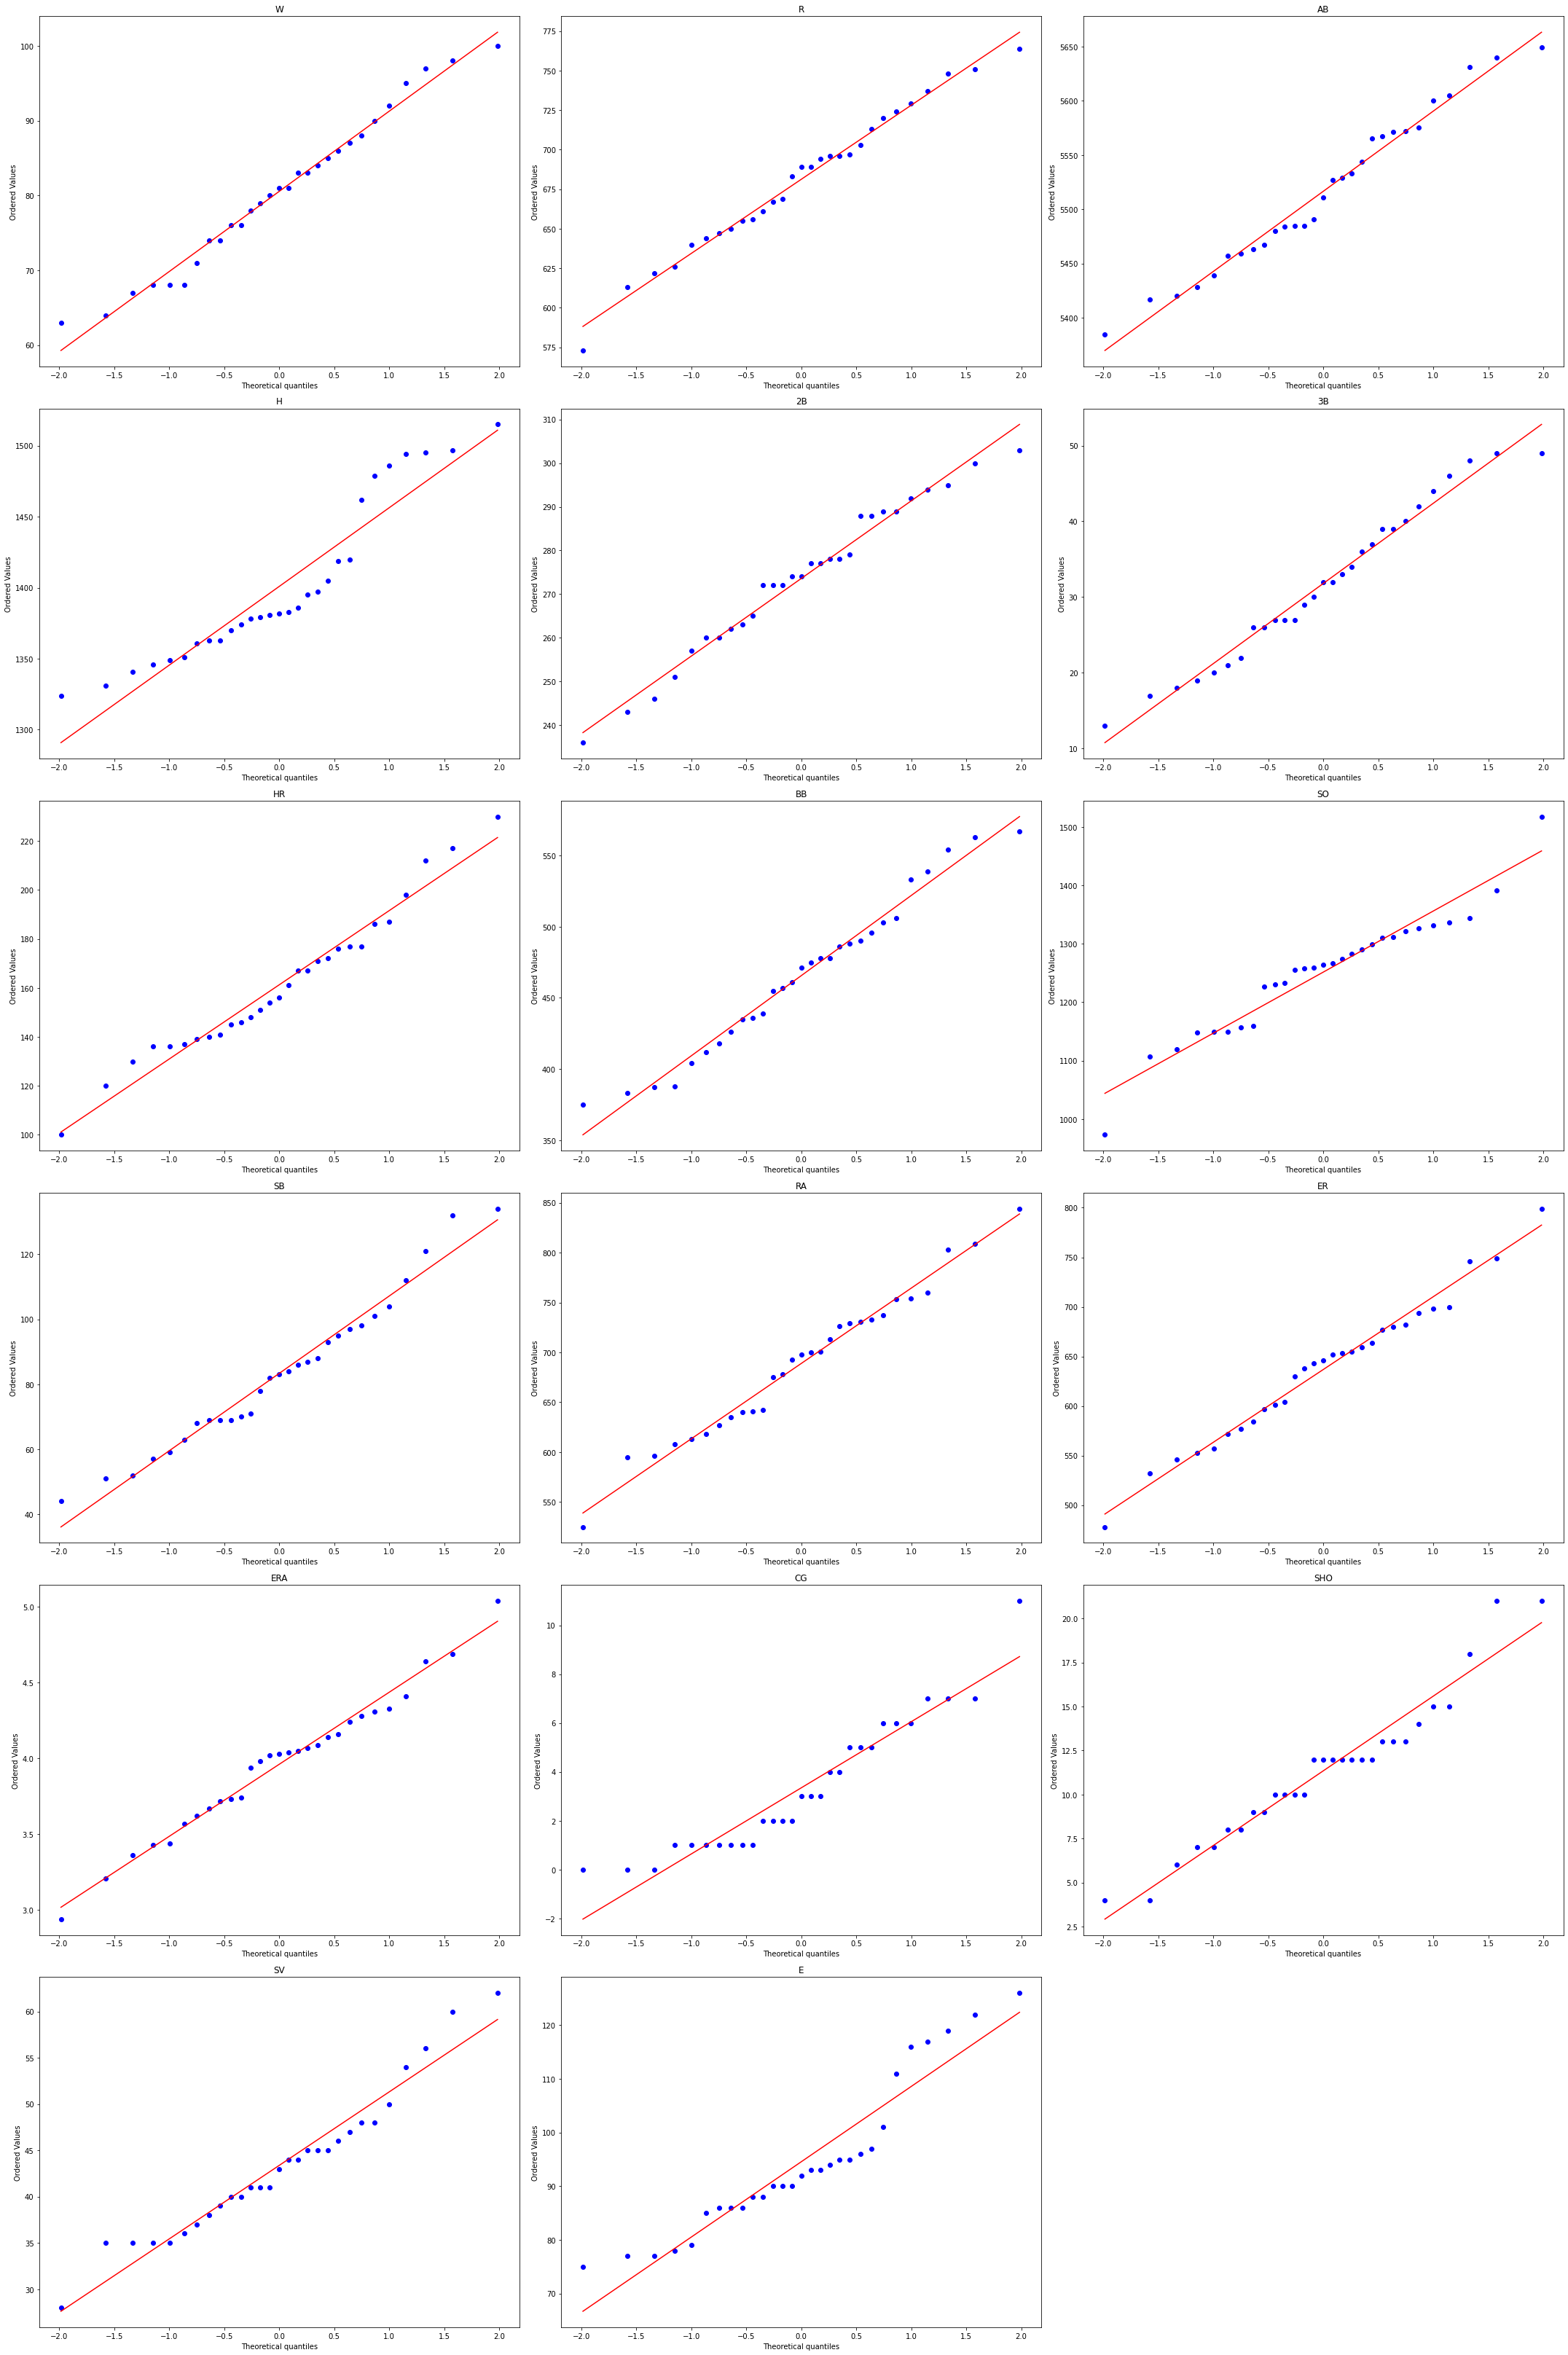

In [29]:
#Importing probplot
from scipy.stats import probplot

#Ploting probplot
plt.figure(figsize = (30,45))
for i in range(17):
    plt.subplot(6,3, i + 1)
    probplot(new_data[col[i]], plot = plt, dist = 'norm')
    plt.title(col[i])
    plt.tight_layout()

In [30]:
#Checking skewness
data.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [31]:
#Checking skewness for new data
new_data.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

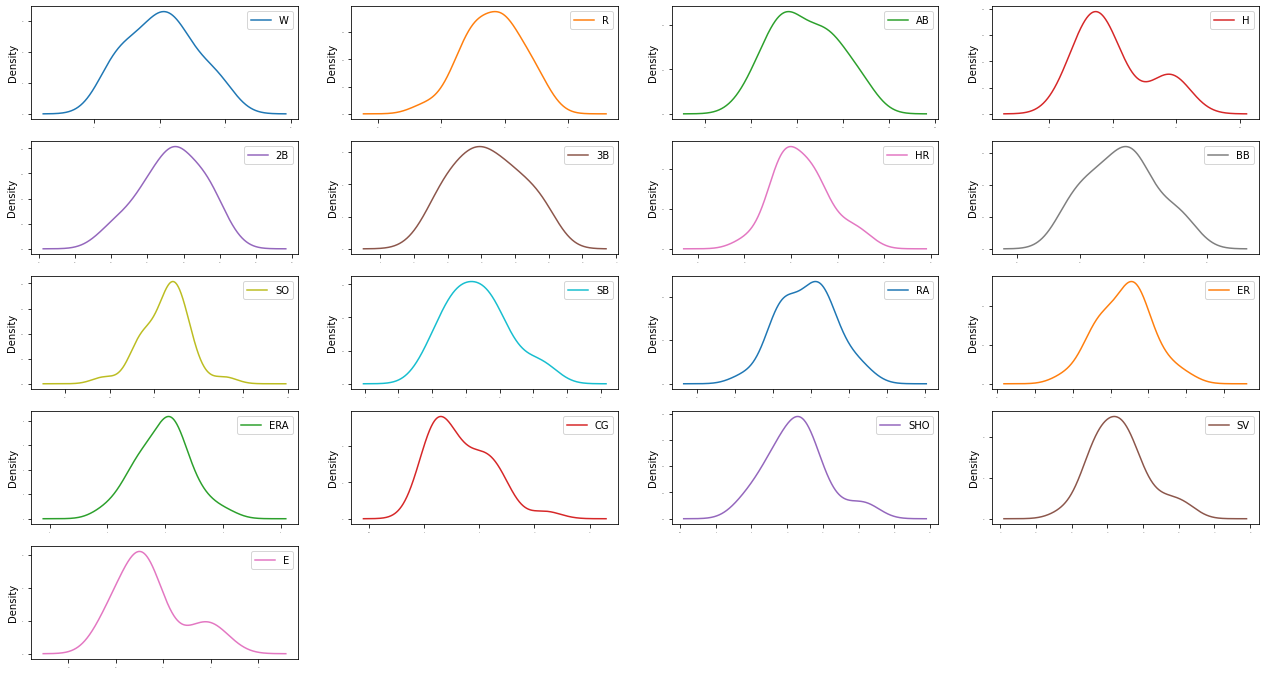

In [32]:
#Checking distribution plot after removing outliers
new_data.plot(kind = 'density', subplots = True, layout = (5,4), sharex = False, legend = True, fontsize = 1, figsize = (22,12))
plt.show()

Data distribution looks good as of now will check and remove outliers again later next will devide data into X and Y variable.

In [33]:
x = new_data.drop(columns = 'W')
y = new_data['W']

In [34]:
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [35]:
y.head()

0    95
1    83
2    81
3    76
4    74
Name: W, dtype: int64

# Scaling data

In [36]:
#Importing Standrd Scaler
from sklearn.preprocessing import StandardScaler

#Assigning standrd scaler into a variable
sc = StandardScaler()

#Scaling x data
x_scaled = sc.fit_transform(x)

# Checking for multicollinearity problem using VIF

In [37]:
#Import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
#Finding Variance inflation factor in each scaled column i.e. x_scaled.shape[1](1/1-R2)
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif['features'] = x.columns

In [39]:
#Let's check values
vif

,vif,features
0,7.229564,R
1,18.333377,AB
2,10.558458,H
3,3.743423,2B
4,3.278636,3B
5,8.426403,HR
6,3.431971,BB
7,2.720640,SO
8,2.110804,SB
9,197.315706,RA


ER has VIF value more than 10 I will drop that column and print VIF again.

In [40]:
#Droping ER column
x = x.drop(columns = ['ER'])

#Scaling x data after removing column ER
x_scaled = sc.fit_transform(x)

#Finding Variance inflation factor in each scaled column i.e. x_scaled.shape[1](1/1-R2)
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif['features'] = x.columns

vif

,vif,features
0,6.789990,R
1,7.689961,AB
2,9.703669,H
3,3.423326,2B
4,3.268301,3B
5,7.683683,HR
6,3.430050,BB
7,2.713114,SO
8,1.907595,SB
9,144.425392,RA


RA has VIF value more than 10 I will drop that column and print VIF again.

In [41]:
#Droping ER column
x = x.drop(columns = ['RA'])

#Scaling x data after removing column ER
x_scaled = sc.fit_transform(x)

#Finding Variance inflation factor in each scaled column i.e. x_scaled.shape[1](1/1-R2)
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif['features'] = x.columns

vif

,vif,features
0,6.787762,R
1,4.981743,AB
2,8.569581,H
3,3.416116,2B
4,3.239565,3B
5,6.590925,HR
6,3.081560,BB
7,2.106522,SO
8,1.842528,SB
9,4.931066,ERA


Multicollinearity problem have been resolved after removing ERA and RA columns.

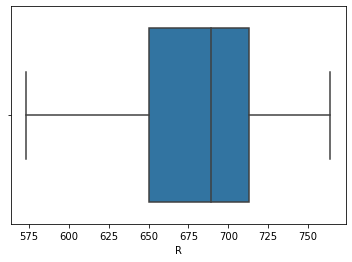

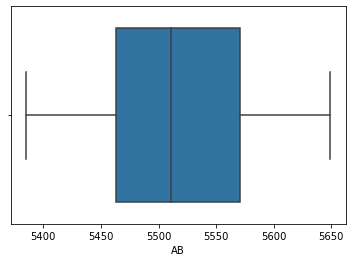

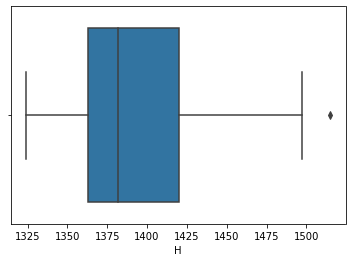

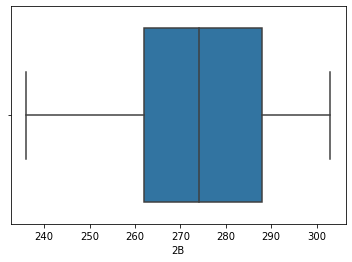

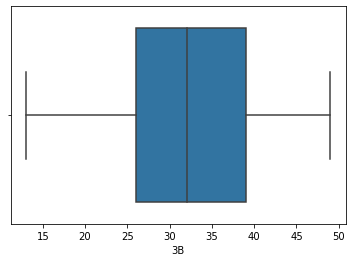

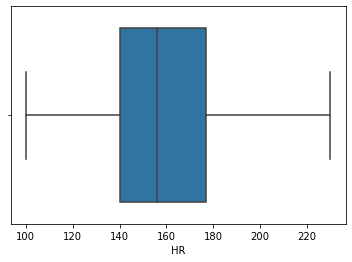

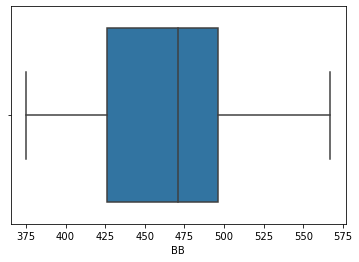

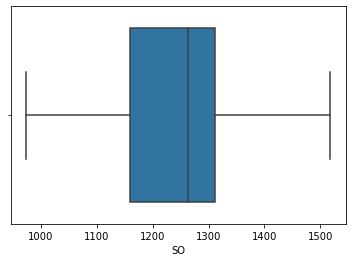

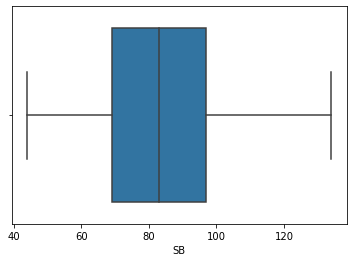

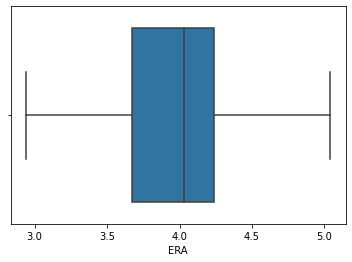

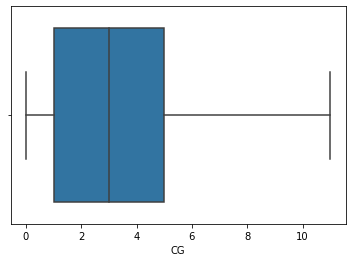

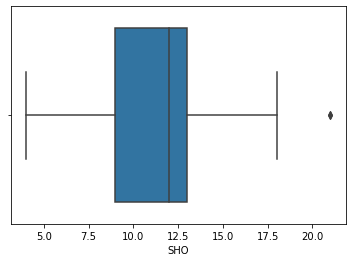

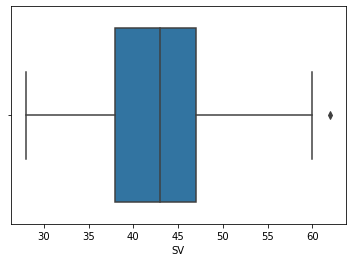

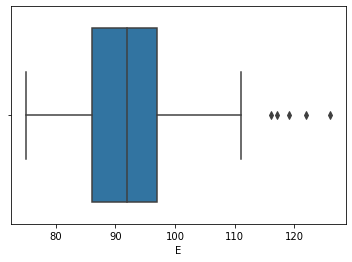

In [42]:
#Checking for outliers again using box plot
for i in x.columns:
    sns.boxplot(x[i])
    plt.show()

Seeing outliers in columns H, SHO, SV and E let's handle ouliers before training model

In [43]:
#Remove outliers for H
def remove_outliers_H(x):
    IQR = x['H'].quantile(0.75) - x['H'].quantile(0.25)
    
    higher_range = x['H'].quantile(0.75) + (1.5 * IQR)
    
    x.loc[x['H'] >= higher_range, 'H'] = higher_range

In [44]:
remove_outliers_H(x)

In [45]:
#Remove outliers for SHO
def remove_outliers_SHO(x):
    IQR1 = x['SHO'].quantile(0.75) - x['SHO'].quantile(0.25)
    
    higher_range1 = x['SHO'].quantile(0.75) + (1.5 * IQR1)
    
    x.loc[x['SHO'] >= higher_range1, 'SHO'] = higher_range1

In [46]:
remove_outliers_SHO(x)

In [47]:
#Remove outliers for SV
def remove_outliers_SV(x):
    IQR2 = x['SV'].quantile(0.75) - x['SV'].quantile(0.25)
    
    higher_range2 = x['SV'].quantile(0.75) + (1.5 * IQR2)
    
    x.loc[x['SV'] >= higher_range2, 'SV'] = higher_range2

In [48]:
remove_outliers_SV(x)

In [49]:
#Remove outliers for E
def remove_outliers_E(x):
    IQR3 = x['E'].quantile(0.75) - x['E'].quantile(0.25)
    
    higher_range3 = x['E'].quantile(0.75) + (1.5 * IQR3)
    
    x.loc[x['E'] >= higher_range3, 'E'] = higher_range3

In [50]:
remove_outliers_E(x)

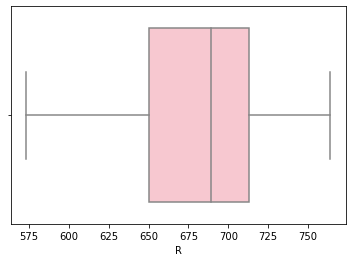

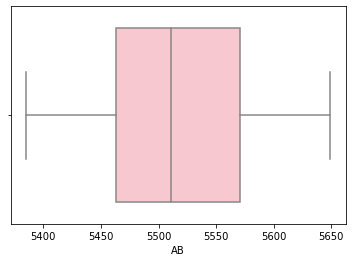

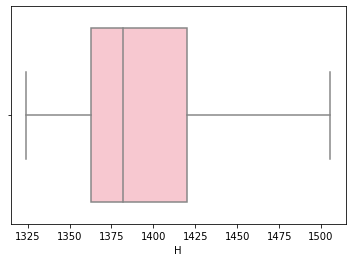

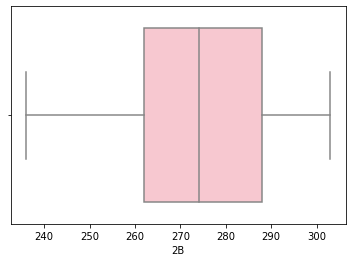

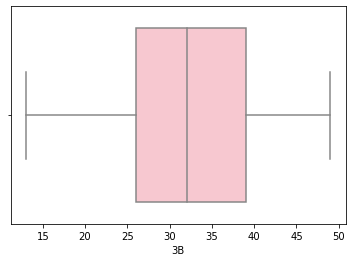

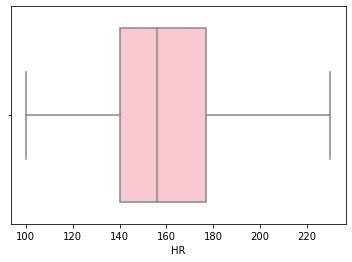

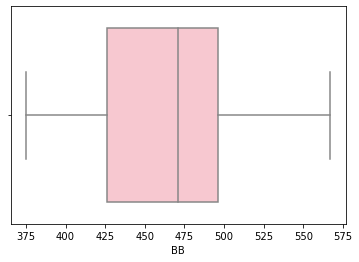

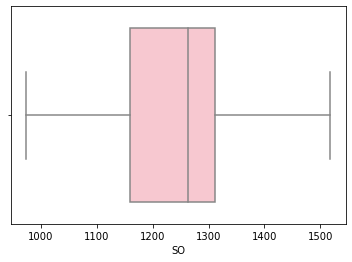

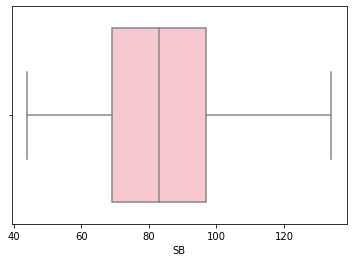

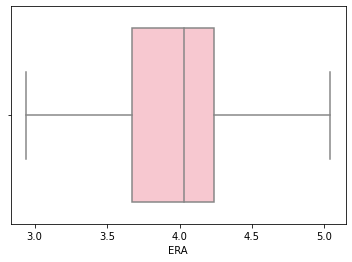

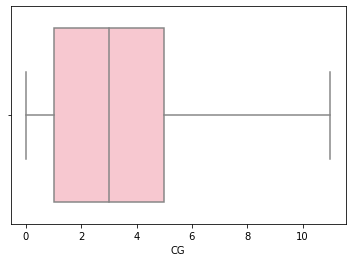

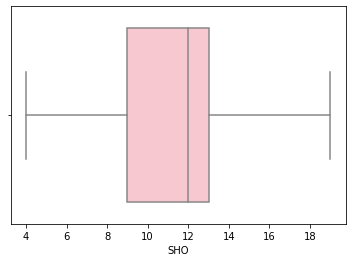

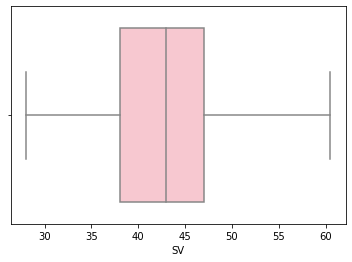

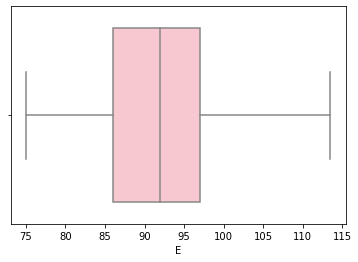

In [51]:
#Checking for ourliers again after removing outliers
for i in x.columns:
    sns.boxplot(x[i], color = 'pink')
    plt.show()

# Data Transformation

In [52]:
#Import Power Transform
from sklearn.preprocessing import power_transform
transformed = power_transform(x)

In [53]:
transform = pd.DataFrame(transformed)
transform.columns = x.columns

In [54]:
#Checking skewness of transformed data
transform.skew()

R     -0.024842
AB     0.081092
H      0.516479
2B    -0.052793
3B    -0.075139
HR     0.000448
BB    -0.008572
SO     0.051530
SB    -0.009570
ERA   -0.000401
CG    -0.045947
SHO   -0.027115
SV    -0.000102
E      0.034601
dtype: float64

# Data Standardization

In [55]:
scaled = sc.fit_transform(transform)

# Spliting data into train/test and Model Building

In [56]:
#Import train test split
from sklearn.model_selection import train_test_split

In [57]:
#Train Test Split / finding best random_state for my model
LR = LinearRegression()

for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(scaled, y ,random_state = i,test_size = 0.2)
    LR.fit(x_train,y_train)
    train_pred = LR.predict(x_train)
    test_pred = LR.predict(x_test)
    if round(r2_score(y_test,test_pred),2) == round(r2_score(y_train,train_pred),2):
        print("At random state ", i, "The model performance very well")
        print("At random state: ",i)
        print("Test R2 score is: ", round(r2_score(y_test,test_pred),2))
        print('Train R2 score is: ', round(r2_score(y_train,train_pred),2))
        print('X' * 50,'\n')

At random state  104 The model performance very well
At random state:  104
Test R2 score is:  0.94
Train R2 score is:  0.94
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  198 The model performance very well
At random state:  198
Test R2 score is:  0.93
Train R2 score is:  0.93
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 



In [58]:
# Select Random state = 104
x_train,x_test,y_train,y_test= train_test_split(scaled , y,random_state = 104,test_size = 0.2)
LR.fit(x_train,y_train)

LinearRegression()

In [59]:
LR_model = LinearRegression()
RD_model = Ridge()
LS_model = Lasso()
DT_model = DecisionTreeRegressor()
SV_model = SVR()
KNR_model = KNeighborsRegressor()
RFR_model = RandomForestRegressor()
XGB_model = XGBRegressor()
Elastic_model = ElasticNet()
SGH_model = SGDRegressor()
Bag_model = BaggingRegressor()
ADA_model = AdaBoostRegressor()
GB_model = GradientBoostingRegressor()

model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,Elastic_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [60]:
#Checking R2 score and MAR and  for all model
for m in model:
    m.fit(x_train,y_train)
    print('MAE of ',m ,'model', mean_absolute_error(y_test, m.predict(x_test)))
    print('MSE of',m,'model' , mean_squared_error(y_test, m.predict(x_test)))
    print('RMSE of',m,'model' , mean_squared_error(y_test, m.predict(x_test), squared = False))
    print('Test R2 Score of',m,'model', r2_score(y_test, m.predict(x_test) ) * 100)
    print("cross Validation score of ", m," is ",cross_val_score(m, transform, y, cv = 10, scoring = 'neg_mean_squared_error').mean())
    print('X' * 50, '\n\n')

MAE of  LinearRegression() model 2.358425795689383
MSE of LinearRegression() model 7.459606258883345
RMSE of LinearRegression() model 2.7312279763658225
Test R2 Score of LinearRegression() model 94.01235618016052
cross Validation score of  LinearRegression()  is  -28.965970730894487
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


MAE of  Ridge() model 2.532397748512151
MSE of Ridge() model 7.998800939311966
RMSE of Ridge() model 2.8282151508172015
Test R2 Score of Ridge() model 93.57955777446531
cross Validation score of  Ridge()  is  -23.824589118029948
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


MAE of  Lasso() model 4.10460715618535
MSE of Lasso() model 22.33532943483024
RMSE of Lasso() model 4.726026812749822
Test R2 Score of Lasso() model 82.07197637338042
cross Validation score of  Lasso()  is  -17.75649727100463
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


MAE of  DecisionTreeRegressor() model 8.0
MSE of DecisionTreeRegressor() model 81.0
RMSE of Decisio

# Linear Regression is giving the best score so far will use Hyper Parameter tuning method and will try to improve the model.

In [61]:
params= {'fit_intercept': [True, False],
        'normalize': ['deprecated'],
         'positive': [True, False]
        }

GCV= GridSearchCV(LR_model,params, cv = 5, scoring = 'r2', n_jobs = -1)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'normalize': ['deprecated'],
                         'positive': [True, False]},
             scoring='r2')

In [62]:
GCV.best_params_

{'fit_intercept': True, 'normalize': 'deprecated', 'positive': True}

In [63]:
GCV_pred = GCV.best_estimator_.predict(x_test)
r2_score(y_test, GCV_pred)

0.7019425759545821

# Performance accuracy has been decreased will save the original Linear Model and later will use it to predict column 'W'.

In [64]:
#Importing pickle to save the best model
import pickle

#Saving the best model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(LR_model, open('Linear_model', 'wb'))

In [65]:
#Prediction using the saved model
loaded_model = pickle.load(open('linear_model','rb'))

In [66]:
#Loading model
Winning = loaded_model.predict(x_test)
Winning

array([88.42688163, 61.31074196, 67.53778691, 87.01006012, 76.44491175,
       84.08446017])

In [67]:
#Creating a DataFrame to showcase Actual vs Predicted numbers.
DF = pd.DataFrame({'Actual Win': y_test, 'Predicted Win': Winning})
DF.head()

,Actual Win,Predicted Win
25,92,88.426882
19,64,61.310742
23,67,67.537787
20,90,87.010060
13,76,76.444912


# Visualizing Error Residual

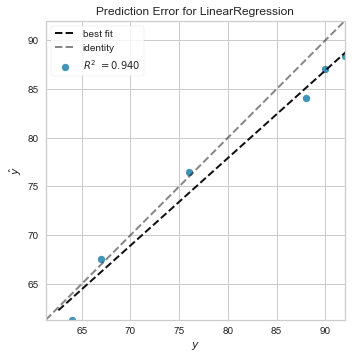

In [68]:
#Importing Prediction Error and Residuals Plot
from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer = PredictionError(LR_model)

#Fit the training data to the visualizer and evaluate the model on the test data
visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test)  
visualizer.poof() 
plt.show()

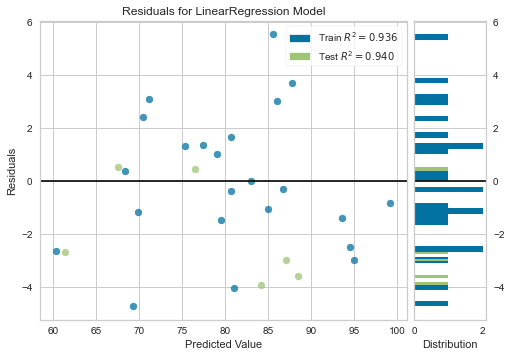

In [69]:
#Residual for Linear model
visualizer = ResidualsPlot(LR_model)
visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test) 
visualizer.poof()
plt.show()